In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import re
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import randint, uniform
import pickle

In [ ]:

path = '/content/drive/MyDrive/NOVARTIS NEST - BioLogits/Data/final_final_dataset.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,NCT Number,Enrollment,Study Recruitment Rate,ec_entropy_1st,ec_entropy_2nd,sponsor_success_rate,prevalent_disease,no_of_sites,population,competition,...,Funder Type_OTHER,Funder Type_OTHER_GOV,Funder Type_UNKNOWN,mesh_id_encoded,Age_ADULT,"Age_ADULT, OLDER_ADULT",Age_CHILD,"Age_CHILD, ADULT","Age_CHILD, ADULT, OLDER_ADULT",Age_OLDER_ADULT
0,NCT00900809,0.000127,0.551598,0.388415,0.841440,0.157895,0.000000,0.000000,0.001035,0.041485,...,0,0,0,0.557916,0,1,0,0,0,0
1,NCT01113515,0.000913,0.443157,0.469609,0.848479,1.000000,0.000083,0.003005,0.033033,0.000000,...,0,0,0,0.486558,0,1,0,0,0,0
2,NCT01288573,0.000956,0.044558,0.473300,0.865510,0.368932,0.000076,0.019534,0.003913,0.000000,...,0,0,0,0.557916,0,0,0,1,0,0
3,NCT01336660,0.001168,7.279202,0.297982,0.641801,0.406903,0.019869,0.000751,0.001231,0.000000,...,0,0,0,0.040325,0,0,1,0,0,0
4,NCT01376167,0.018055,1.969008,0.416185,0.868752,0.486604,0.000012,0.009767,0.022178,0.000000,...,0,0,0,0.035181,0,0,0,0,1,0


In [ ]:
df.columns

Index(['NCT Number', 'Enrollment', 'Study Recruitment Rate', 'ec_entropy_1st',
       'ec_entropy_2nd', 'sponsor_success_rate', 'prevalent_disease',
       'no_of_sites', 'population', 'competition', 'Allocation_NA',
       'Allocation_NON_RANDOMIZED', 'Allocation_RANDOMIZED',
       'Intervention Model_CROSSOVER', 'Intervention Model_PARALLEL',
       'Intervention Model_SEQUENTIAL', 'Intervention Model_SINGLE_GROUP',
       'Masking Complexity_DOUBLE', 'Masking Complexity_NONE',
       'Masking Complexity_QUADRUPLE', 'Masking Complexity_SINGLE',
       'Masking Complexity_TRIPLE', 'Primary Purpose_BASIC_SCIENCE',
       'Primary Purpose_OTHER', 'Primary Purpose_PREVENTION',
       'Primary Purpose_TREATMENT', 'PHASE1', 'PHASE2', 'PHASE3',
       'study_duration', 'Study Status_ACTIVE_NOT_RECRUITING',
       'Study Status_COMPLETED', 'Study Status_ENROLLING_BY_INVITATION',
       'Study Status_NOT_YET_RECRUITING', 'Study Status_RECRUITING',
       'Study Status_SUSPENDED', 'Study Stat

In [ ]:
features = ['Enrollment', 'ec_entropy_1st',
       'ec_entropy_2nd', 'sponsor_success_rate', 'prevalent_disease',
       'no_of_sites', 'population', 'competition', 'Allocation_NA',
       'Allocation_NON_RANDOMIZED', 'Allocation_RANDOMIZED',
       'Intervention Model_CROSSOVER', 'Intervention Model_PARALLEL',
       'Intervention Model_SEQUENTIAL', 'Intervention Model_SINGLE_GROUP',
       'Masking Complexity_DOUBLE', 'Masking Complexity_NONE',
       'Masking Complexity_QUADRUPLE', 'Masking Complexity_SINGLE',
       'Masking Complexity_TRIPLE', 'Primary Purpose_BASIC_SCIENCE',
       'Primary Purpose_OTHER', 'Primary Purpose_PREVENTION',
       'Primary Purpose_TREATMENT', 'PHASE1', 'PHASE2', 'PHASE3',
       'study_duration', 'Study Status_ACTIVE_NOT_RECRUITING',
       'Study Status_COMPLETED', 'Study Status_ENROLLING_BY_INVITATION',
       'Study Status_NOT_YET_RECRUITING', 'Study Status_RECRUITING',
       'Study Status_SUSPENDED', 'Study Status_TERMINATED',
       'Study Status_UNKNOWN', 'Study Results_NO', 'Study Results_YES',
       'Sex_ALL', 'Sex_FEMALE', 'Sex_MALE', 'Funder Type_FED',
       'Funder Type_INDIV', 'Funder Type_INDUSTRY', 'Funder Type_NETWORK',
       'Funder Type_NIH', 'Funder Type_OTHER', 'Funder Type_OTHER_GOV',
       'Funder Type_UNKNOWN', 'mesh_id_encoded', 'Age_ADULT',
       'Age_ADULT, OLDER_ADULT', 'Age_CHILD', 'Age_CHILD, ADULT',
       'Age_CHILD, ADULT, OLDER_ADULT', 'Age_OLDER_ADULT']
target = 'Study Recruitment Rate'

In [ ]:
import numpy as np
import pandas as pd


def plot_feature_importance_with_cumulative(X, y, threshold=0.99):
    """
    Trains a Random Forest, plots cumulative feature importance, and returns top features.

    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        threshold (float): Cumulative importance threshold (default: 0.998).

    Returns:
        List of top features that explain the given threshold of target variance.
    """
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    feature_importances = rf.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    sorted_features = X.columns[sorted_idx]
    sorted_importances = feature_importances[sorted_idx]

    cumulative_importance = np.cumsum(sorted_importances)

    plt.figure(figsize=(12, 8))
    plt.plot(cumulative_importance, color='royalblue', linewidth=2, marker='o')

    n_features = np.where(cumulative_importance >= threshold)[0][0] + 1
    plt.axvline(x=n_features - 1, color='royalblue', linestyle='--')

    plt.ylabel("Cumulative Importance")
    plt.xlabel("Features")
    plt.xticks(ticks=range(len(sorted_features)), labels=sorted_features, rotation=90)
    plt.title("Cumulative Feature Importance")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"Top {n_features} features explaining {threshold*100:.1f}% of the target:")

    return sorted_features[:n_features].tolist()

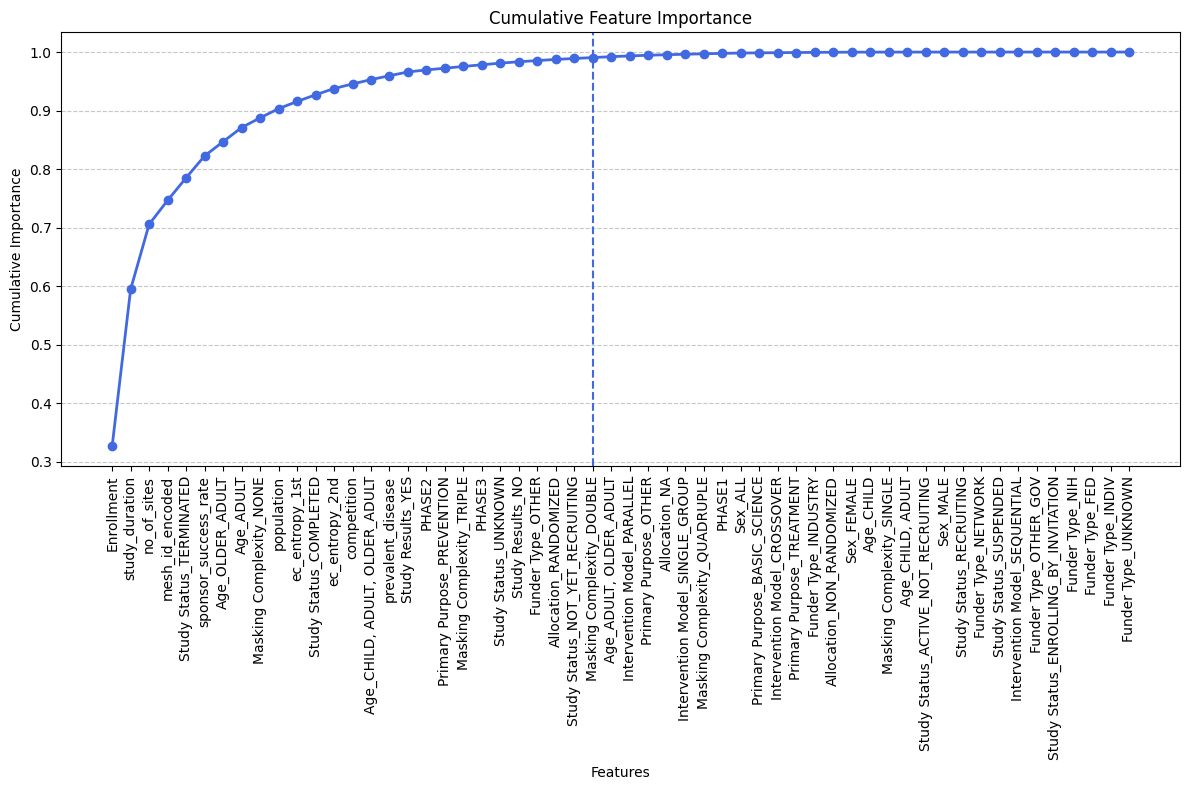

Top 27 features explaining 99.0% of the target:


In [ ]:
max_exp_feature = plot_feature_importance_with_cumulative(X, y, threshold=0.99)

In [ ]:
top_feature_names = max_exp_feature

In [ ]:
X = df[top_feature_names]
y = df[target]

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
X.columns

Index(['Enrollment', 'study_duration', 'no_of_sites', 'mesh_id_encoded',
       'Study Status_TERMINATED', 'sponsor_success_rate', 'Age_OLDER_ADULT',
       'Age_ADULT', 'Masking Complexity_NONE', 'population', 'ec_entropy_1st',
       'Study Status_COMPLETED', 'ec_entropy_2nd', 'competition',
       'Age_CHILD, ADULT, OLDER_ADULT', 'prevalent_disease',
       'Study Results_YES', 'PHASE2', 'Primary Purpose_PREVENTION',
       'Masking Complexity_TRIPLE', 'PHASE3', 'Study Status_UNKNOWN',
       'Study Results_NO', 'Funder Type_OTHER', 'Allocation_RANDOMIZED',
       'Study Status_NOT_YET_RECRUITING', 'Masking Complexity_DOUBLE'],
      dtype='object')

In [ ]:
X.to_csv('/content/drive/MyDrive/NOVARTIS NEST - BioLogits/selected_features_final.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

# Linear Regression
def linear_regression(X_train, X_val, X_test, y_train, y_val, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# Decision Tree Regressor
def decision_tree_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# Random Forest Regressor
def random_forest_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# Gradient Boosting Regressor
def gradient_boosting_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# XGB Regressor
def xgb_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = XGBRegressor(random_state=42, eval_metric="mae")
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# CatBoost Regressor
def catboost_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# LightGBM Regressor
def lgb_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)

# AdaBoost Regressor
def adaboost_regressor(X_train, X_val, X_test, y_train, y_val, y_test):
    model = AdaBoostRegressor(random_state=42)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)
    return calculate_metrics(y_train, train_preds), calculate_metrics(y_val, val_preds), calculate_metrics(y_test, test_preds)


In [ ]:
if __name__ == "__main__":

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=45)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)

    print("Linear Regression:", linear_regression(X_train, X_val, X_test, y_train, y_val, y_test))
    print("Random Forest Regressor:", random_forest_regressor(X_train, X_val, X_test, y_train, y_val, y_test))
    print("Gradient Boosting Regressor:", gradient_boosting_regressor(X_train, X_val, X_test, y_train, y_val, y_test))
    print("XGB Regressor:", xgb_regressor(X_train, X_val, X_test, y_train, y_val, y_test))
    print("CatBoost Regressor:", catboost_regressor(X_train, X_val, X_test, y_train, y_val, y_test))
    print("AdaBoost Regressor:", adaboost_regressor(X_train, X_val, X_test, y_train, y_val, y_test))
    print("Decision Tree Regressor:", decision_tree_regressor(X_train, X_val, X_test, y_train, y_val, y_test))


Linear Regression: ((0.13367114821561754, 43.83146647019647, 8.136792950610879), (0.10607030992152733, 53.90734937692948, 8.871647162931396), (-0.07962709845835025, 33.56847154239211, 8.215884146498903))
Random Forest Regressor: ((0.9154219743486733, 13.695357816915422, 0.5053873124251734), (0.45578995813166057, 42.060997967765275, 1.7142854608572466), (0.6747237818059925, 18.425565886948938, 1.1381722647631107))
Gradient Boosting Regressor: ((0.9920981829955507, 4.186085513755039, 1.6463648774791524), (0.5117497823423323, 39.83983398452013, 2.8623194372342518), (0.7654486698730025, 15.646371181526941, 2.322704669911033))
XGB Regressor: ((0.9998917307427294, 0.4900012532166643, 0.27322903627374845), (0.47748168137531377, 41.21421739680793, 2.1855982030424626), (0.38409449191436695, 25.354305726278263, 1.4527904639858955))
CatBoost Regressor: ((0.9994974575890256, 1.0556767856115523, 0.6087124290795999), (0.4234595988460115, 43.29235093078255, 2.3562051696905817), (0.5893274857725953, 2

In [ ]:
def clean_column_names(df):
    df.columns = [re.sub(r"[^a-zA-Z0-9]", "_", col) for col in df.columns]
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)
print("LightGBM Regressor:", lgb_regressor(X_train, X_val, X_test, y_train, y_val, y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2512
[LightGBM] [Info] Number of data points in the train set: 16539, number of used features: 26
[LightGBM] [Info] Start training from score 6.598898
LightGBM Regressor: ((0.5472928612998329, 31.68496877438141, 1.69294793451291), (0.23155067700814547, 49.98088172973217, 2.8551887096047888), (0.3274618348422548, 26.49434249282687, 2.4416788887708227))


In [ ]:
X_train = clean_column_names(X_train)
X_val = clean_column_names(X_val)
X_test = clean_column_names(X_test)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd


rf_param_grid = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ['auto', 'sqrt', 'log2']
}

gbm_param_grid = {
    "n_estimators": randint(100, 500),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "subsample": uniform(0.5, 1.0)
}

def tune_random_forest(X_train, y_train):
    rf = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=15, cv=3, scoring="r2", n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Random Forest Params:", random_search.best_params_)
    return random_search.best_estimator_, random_search.best_params_

def tune_gradient_boosting(X_train, y_train):
    gbm = GradientBoostingRegressor(random_state=42)
    random_search = RandomizedSearchCV(gbm, gbm_param_grid, n_iter=15, cv=3, scoring="r2", n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Gradient Boosting Params:", random_search.best_params_)
    return random_search.best_estimator_, random_search.best_params_

best_rf, best_rf_params = tune_random_forest(X_train, y_train)
best_gbm, best_gbm_params = tune_gradient_boosting(X_train, y_train)
print("RF Validation R²:", r2_score(y_val, best_rf.predict(X_val)))
print("GBM Validation R²:", r2_score(y_val, best_gbm.predict(X_val)))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

Best Random Forest Params: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_estimators': 439}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

Best Gradient Boosting Params: {'learning_rate': 0.12854507080054434, 'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 17, 'n_estimators': 370, 'subsample': 0.5884925020519195}


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_CHILD, ADULT, OLDER_ADULT
- Funder Type_OTHER
- Masking Complexity_DOUBLE
- Masking Complexity_NONE
- Masking Complexity_TRIPLE
- ...
Feature names seen at fit time, yet now missing:
- Age_CHILD__ADULT__OLDER_ADULT
- Funder_Type_OTHER
- Masking_Complexity_DOUBLE
- Masking_Complexity_NONE
- Masking_Complexity_TRIPLE
- ...


In [ ]:
import optuna
import pandas as pd
import numpy as np

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 340, 420),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.18, log=True),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "min_samples_split": trial.suggest_int("min_samples_split", 15, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 0.8),
    }

    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return r2_score(y_val, y_pred)


In [ ]:
study_gb = optuna.create_study(direction="maximize")
study_gb.optimize(objective, n_trials=30)

print("Best Hyperparameters:", study_gb.best_params)
print("Best R² Score:", study_gb.best_value)


[I 2025-02-16 17:41:09,100] A new study created in memory with name: no-name-c91c5923-249f-4075-8712-63b11064a3cf
[I 2025-02-16 17:41:27,050] Trial 0 finished with value: 0.6030377667097947 and parameters: {'n_estimators': 403, 'learning_rate': 0.11790226519475056, 'max_depth': 4, 'min_samples_split': 27, 'min_samples_leaf': 12, 'subsample': 0.5379576987606473}. Best is trial 0 with value: 0.6030377667097947.
[I 2025-02-16 17:41:42,680] Trial 1 finished with value: 0.734575047529858 and parameters: {'n_estimators': 380, 'learning_rate': 0.15827060840481932, 'max_depth': 4, 'min_samples_split': 19, 'min_samples_leaf': 13, 'subsample': 0.5193241780217945}. Best is trial 1 with value: 0.734575047529858.
[I 2025-02-16 17:42:23,479] Trial 2 finished with value: 0.5091465129996129 and parameters: {'n_estimators': 392, 'learning_rate': 0.10216180801327908, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 5, 'subsample': 0.7517361675167619}. Best is trial 1 with value: 0.7345750475

Best Hyperparameters: {'n_estimators': 376, 'learning_rate': 0.1620218939204875, 'max_depth': 6, 'min_samples_split': 23, 'min_samples_leaf': 16, 'subsample': 0.6386490699330184}
Best R² Score: 0.7774872236379721


In [ ]:
model = GradientBoostingRegressor(**study_gb.best_params, random_state=42)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_test)
mae_gb = mean_absolute_error(y_test, y_pred_test)


In [ ]:
y_pred_val = model.predict(X_val)
r2_gb_val = r2_score(y_val, y_pred_val)
mae_gb_val = mean_absolute_error(y_val, y_pred_val)

In [ ]:
print(r2_gb_val)
print(mae_gb_val)

0.7774872236379721
2.5672370956103165


In [ ]:
def objective_mae(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 340, 420),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.18, log=True),
        "max_depth": trial.suggest_int("max_depth", 4, 7),
        "min_samples_split": trial.suggest_int("min_samples_split", 15, 30),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 0.8),
    }

    model = GradientBoostingRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    return mean_absolute_error(y_val, y_pred)

study_gb_mae = optuna.create_study(direction="minimize")
study_gb_mae.optimize(objective_mae, n_trials=30)

print("Best Hyperparameters:", study_gb_mae.best_params)
print("Best R² Score:", study_gb_mae.best_value)


[I 2025-02-16 18:08:23,193] A new study created in memory with name: no-name-84b5af64-94b9-4955-9a81-6691a51076b3
[I 2025-02-16 18:08:47,966] Trial 0 finished with value: 3.354842281539577 and parameters: {'n_estimators': 364, 'learning_rate': 0.15589948148134575, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 19, 'subsample': 0.7174653518829379}. Best is trial 0 with value: 3.354842281539577.
[I 2025-02-16 18:09:17,740] Trial 1 finished with value: 2.545357547757074 and parameters: {'n_estimators': 394, 'learning_rate': 0.13428280395651485, 'max_depth': 7, 'min_samples_split': 26, 'min_samples_leaf': 18, 'subsample': 0.5791202884896411}. Best is trial 1 with value: 2.545357547757074.
[I 2025-02-16 18:09:48,448] Trial 2 finished with value: 3.377049925392997 and parameters: {'n_estimators': 415, 'learning_rate': 0.16426546253704183, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 16, 'subsample': 0.7779360143995477}. Best is trial 1 with value: 2.545357547757

Best Hyperparameters: {'n_estimators': 407, 'learning_rate': 0.1447007338743314, 'max_depth': 7, 'min_samples_split': 22, 'min_samples_leaf': 11, 'subsample': 0.7444419171903445}
Best R² Score: 2.1141039051178048


In [ ]:
model = GradientBoostingRegressor(**study_gb_mae.best_params, random_state=42)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_test)
mae_gb = mean_absolute_error(y_test, y_pred_test)


In [ ]:
print(r2_gb)
print(mae_gb)

0.8649108204388726
1.8243132471022616


In [ ]:
final_model = model

In [ ]:

with open("/content/drive/MyDrive/NOVARTIS NEST - BioLogits/best_gradient_boosting_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 350, 500),
        "max_depth": trial.suggest_int("max_depth", 10, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 20),
        "max_features": trial.suggest_categorical("max_features", ['sqrt'])
    }

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return r2_score(y_val, y_pred)

In [ ]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=25)

print("Best Hyperparameters:", study_rf.best_params)
print("Best R² Score:", study_rf.best_value)


[I 2025-02-16 19:01:59,768] A new study created in memory with name: no-name-b56e9eda-1392-4bd6-9b91-b4ebbed8dd4a
[I 2025-02-16 19:02:17,455] Trial 0 finished with value: 0.5149450396647102 and parameters: {'n_estimators': 378, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5149450396647102.
[I 2025-02-16 19:02:35,640] Trial 1 finished with value: 0.5235220907280369 and parameters: {'n_estimators': 497, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5235220907280369.
[I 2025-02-16 19:02:47,403] Trial 2 finished with value: 0.4911613842143875 and parameters: {'n_estimators': 375, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5235220907280369.
[I 2025-02-16 19:03:05,299] Trial 3 finished with value: 0.5383525029595595 and parameters: {'n_estimators': 500, 'max_depth': 17,

Best Hyperparameters: {'n_estimators': 500, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best R² Score: 0.600047846049083


In [ ]:
rf_model_r2 = RandomForestRegressor(**study_rf.best_params, random_state=42)
rf_model_r2.fit(X_train, y_train)

y_pred_test = rf_model_r2.predict(X_test)
r2_rf = r2_score(y_test, y_pred_test)
mae_rf = mean_absolute_error(y_test, y_pred_test)


In [ ]:
print(r2_rf)
print(mae_rf)

0.5990612203269807
2.913370584019739


In [ ]:
def objective_rf_mae(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 350, 500),
        "max_depth": trial.suggest_int("max_depth", 10, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 20),
        "max_features": trial.suggest_categorical("max_features", ['sqrt'])
    }

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return mean_absolute_error(y_val, y_pred)

In [ ]:
study_rf_mae = optuna.create_study(direction="minimize")
study_rf_mae.optimize(objective_rf_mae, n_trials=25)

print("Best Hyperparameters:", study_rf_mae.best_params)
print("Best R² Score:", study_rf_mae.best_value)


[I 2025-02-16 18:36:17,712] A new study created in memory with name: no-name-6e5cb5b9-66f6-4f3e-bd90-6b275b1a3e0b
[I 2025-02-16 18:36:31,826] Trial 0 finished with value: 3.3679070211925164 and parameters: {'n_estimators': 449, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 0 with value: 3.3679070211925164.
[I 2025-02-16 18:36:47,154] Trial 1 finished with value: 3.3362046386544515 and parameters: {'n_estimators': 494, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 1 with value: 3.3362046386544515.
[I 2025-02-16 18:37:01,095] Trial 2 finished with value: 3.395082553280808 and parameters: {'n_estimators': 480, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 3.3362046386544515.
[I 2025-02-16 18:37:10,912] Trial 3 finished with value: 3.8386385230332563 and parameters: {'n_estimators': 385, 'max_depth': 10, '

Best Hyperparameters: {'n_estimators': 468, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best R² Score: 2.8763347319586443


In [ ]:
rf_model = RandomForestRegressor(**study_rf_mae.best_params, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_test)
mae_rf = mean_absolute_error(y_test, y_pred_test)


In [ ]:
print(r2_rf)
print(mae_rf)

0.608646884629936
2.6546400968824915


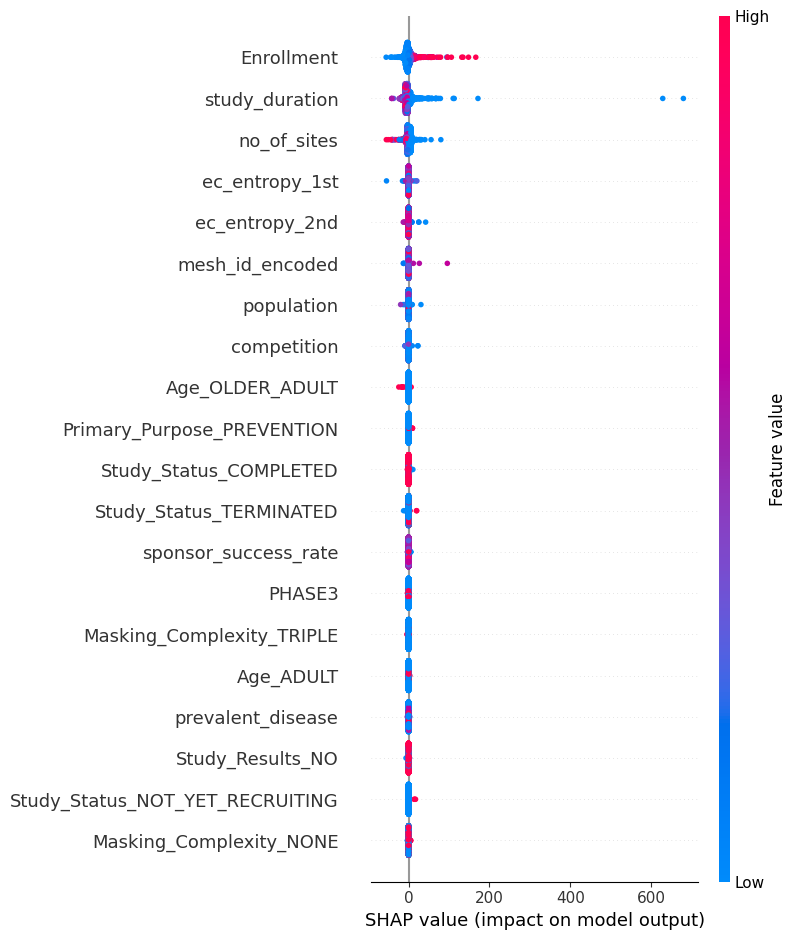

In [ ]:
import shap

explainer = shap.TreeExplainer(final_model)

shap_values = explainer.shap_values(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test)



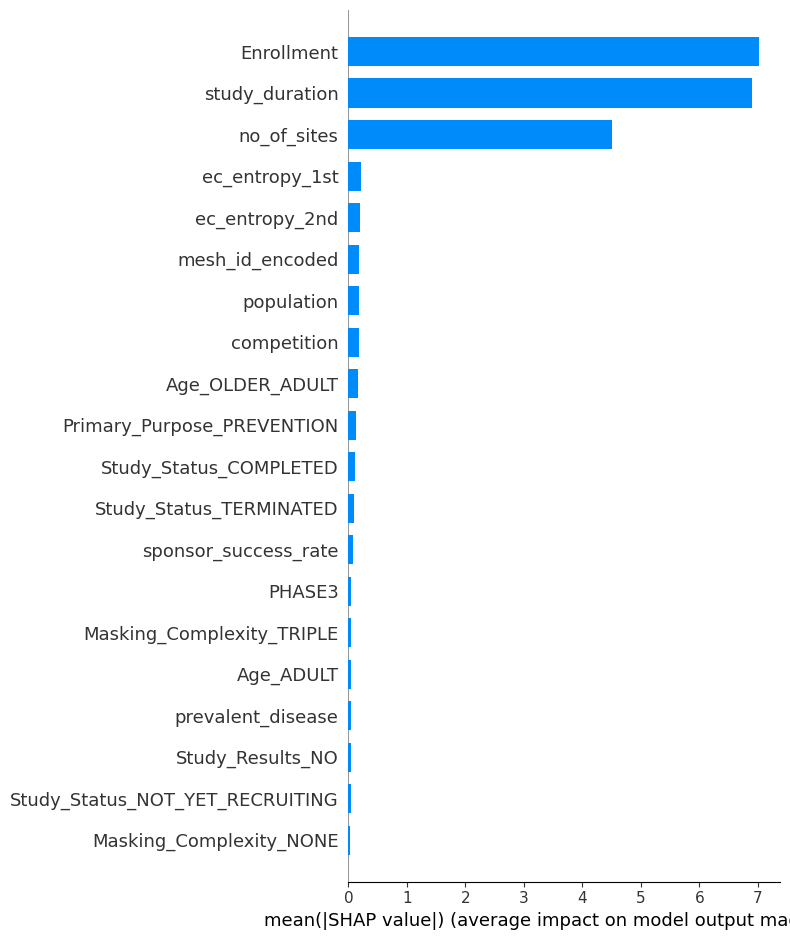

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2e177a4b9902d2b9d2cf116670b1d269920aad43983a5684d35477fa2cef20dc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


SHAP analysis for index 94, Y=0.7849462365591399


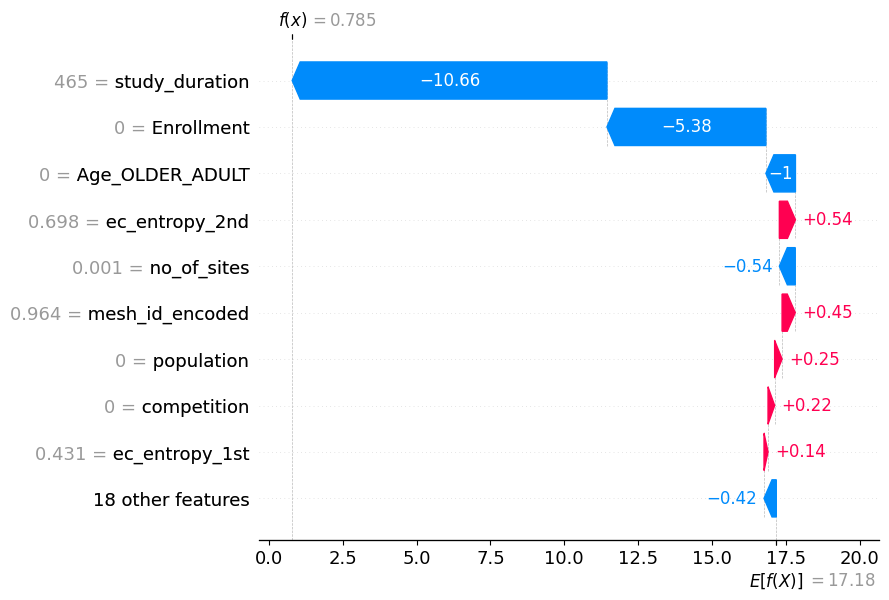

SHAP analysis for index 216, Y=0.0983297413793103


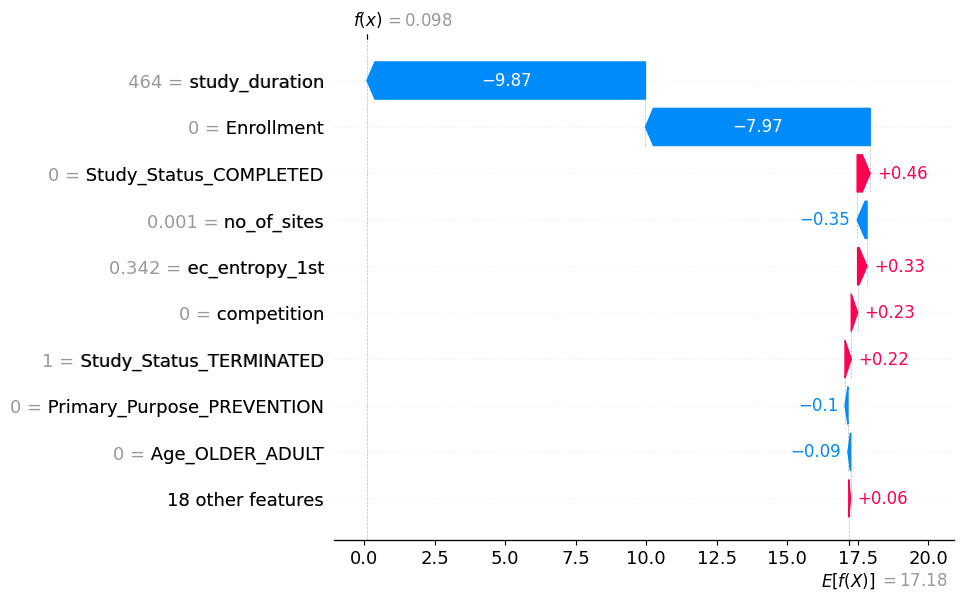

SHAP analysis for index 553, Y=0.1578595580718723


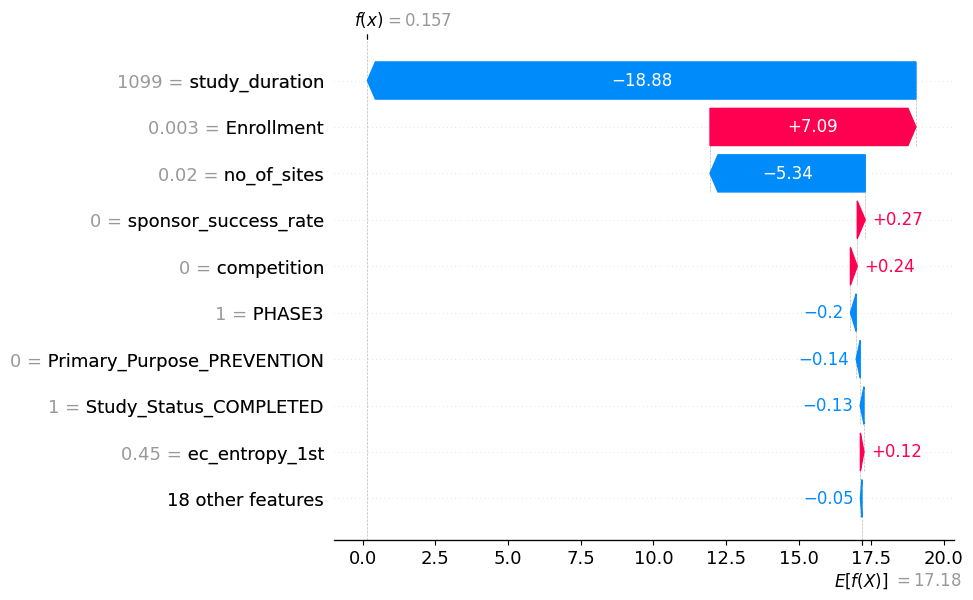

SHAP analysis for index 1756, Y=0.0400359247065654


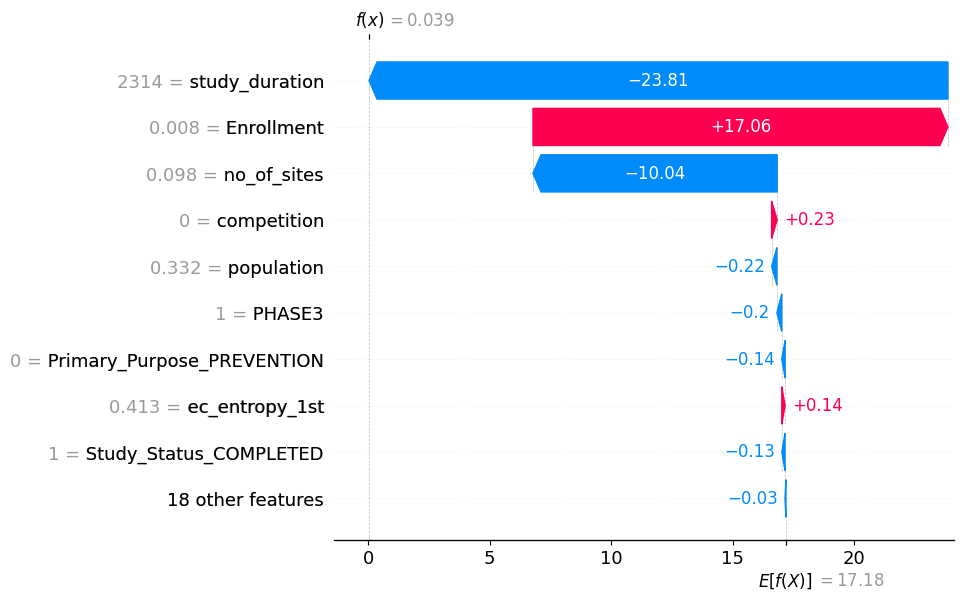

In [ ]:

def shap_top_k_least_error(model, X_test, y_test, k=3):
    predictions = model.predict(X_test)
    errors = np.abs(predictions - y_test)
    top_indices = np.argsort(errors)[:k]

    explainer = shap.Explainer(model, X_test)

    for idx in top_indices:
        shap_values = explainer(X_test.iloc[[idx]])
        print(f"SHAP analysis for index {idx}, Y={y_test.iloc[idx]}")
        shap.plots.waterfall(shap_values[0], )
        plt.show()

shap_top_k_least_error(final_model, X_test, y_test, k=4)

SHAP analysis for index 94 with least error:


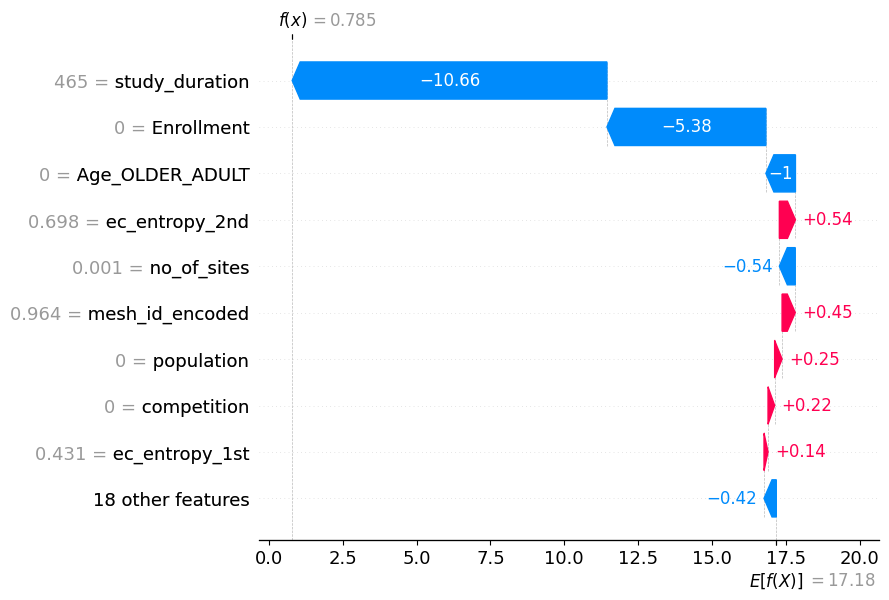

SHAP analysis for index 216 with least error:


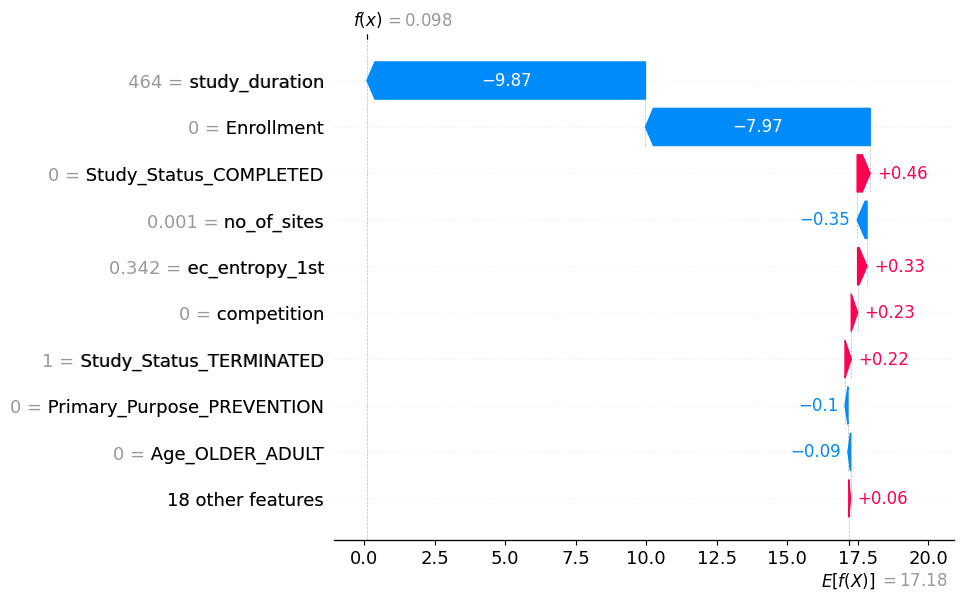

SHAP analysis for index 553 with least error:


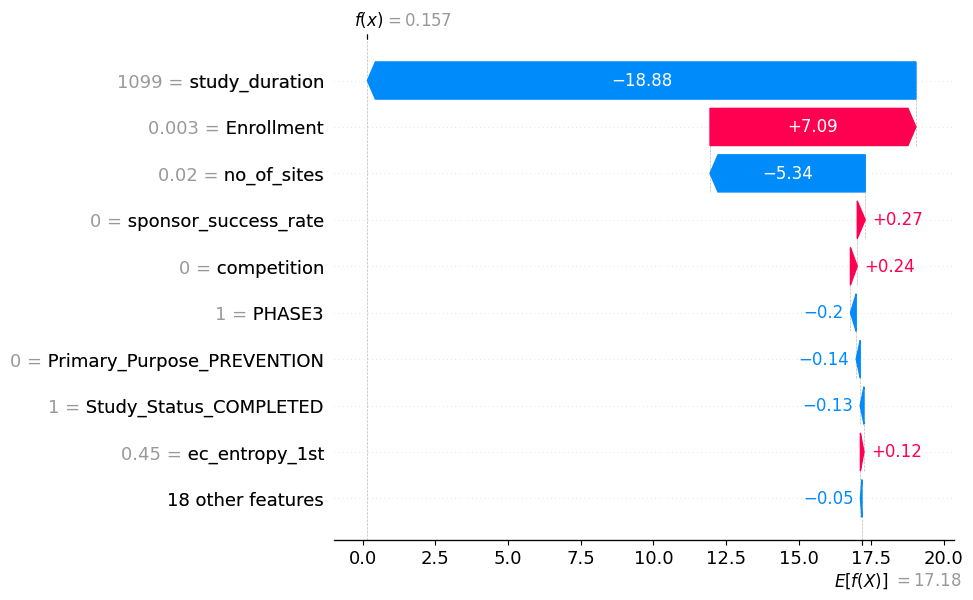

SHAP analysis for index 1756 with least error:


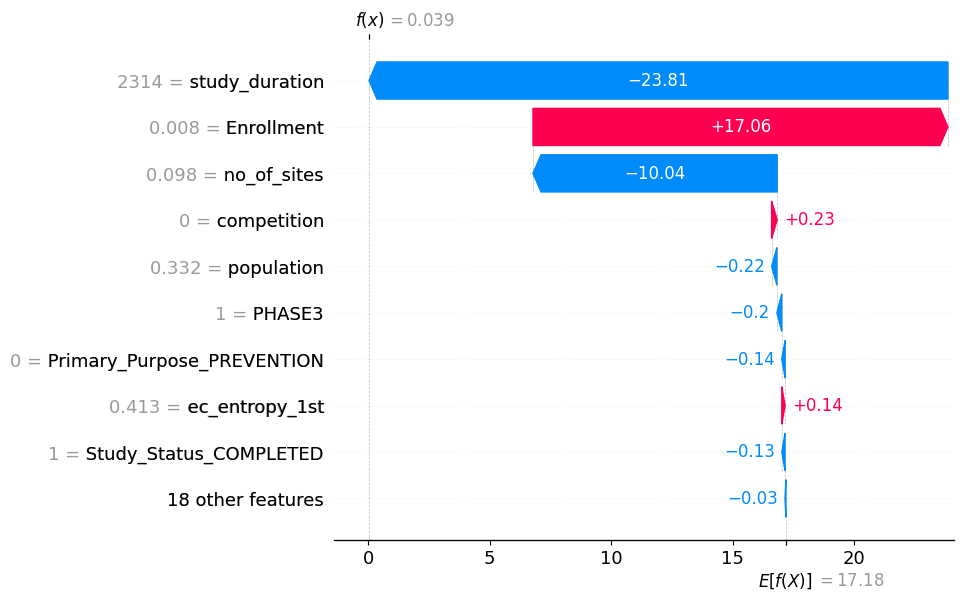

In [ ]:
def shap_top_k_least_error(model, X_test, y_test, k=3):
    predictions = model.predict(X_test)
    errors = np.abs(predictions - y_test)
    top_indices = np.argsort(errors)[:k]

    explainer = shap.Explainer(model, X_test)

    for idx in top_indices:
        shap_values = explainer(X_test.iloc[[idx]])
        print(f"SHAP analysis for index {idx} with least error:")
        shap.plots.waterfall(shap_values[0])
        plt.show()

shap_top_k_least_error(final_model, X_test, y_test, k=4)

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
def lime_top_k_least_error(model, X_test, y_test, feature_names, k=3):
    predictions = model.predict(X_test)
    errors = np.abs(predictions - y_test)
    top_indices = np.argsort(errors)[:k]

    explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=feature_names, mode='regression')

    for idx in top_indices:
        exp = explainer.explain_instance(X_test.values[idx], model.predict, num_features=len(feature_names))
        print(f"LIME analysis for index {idx} with least error:")
        exp.show_in_notebook()
        plt.show()

lime_top_k_least_error(final_model, X_test, y_test, top_feature_names, k=4)

Output hidden; open in https://colab.research.google.com to view.